In [1]:
import findspark
findspark.init()

import pyspark 
from pyspark import SparkContext
sc =SparkContext.getOrCreate()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('electric vehicle').getOrCreate()
from pyspark.sql import  functions
from pyspark.ml import Pipeline
from pyspark.sql.functions import count




In [3]:
#Load the csv file into Dataframe,The code used is given below.

df = spark.read.option('header','true').option('inferSchema','true').csv("ElectricCarData_Norm.csv")

In [4]:
#Print the columns. The code used is given below:
print(df.columns)

['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro']


In [285]:
#Count the no of records.
print(df.count())

103


In [203]:
#Display record in different ways:1.take Funtion   

df.take(1)

[Row(Brand='Tesla ', Model='Model 3 Long Range Dual Motor', Accel='4.6 sec', TopSpeed='233 km/h', Range='450 km', Efficiency='161 Wh/km', FastCharge='940 km/h', RapidCharge='Rapid charging possible', PowerTrain='All Wheel Drive', PlugType='Type 2 CCS', BodyStyle='Sedan', Segment='D', Seats=5, PriceEuro=55480)]

In [286]:
#Show Function – shows the results in a structured format

df.show(2)


+-----------+--------------------+--------+--------+------+----------+----------+--------------------+----------------+----------+---------+-------+-----+---------+
|      Brand|               Model|   Accel|TopSpeed| Range|Efficiency|FastCharge|         RapidCharge|      PowerTrain|  PlugType|BodyStyle|Segment|Seats|PriceEuro|
+-----------+--------------------+--------+--------+------+----------+----------+--------------------+----------------+----------+---------+-------+-----+---------+
|     Tesla |Model 3 Long Rang...| 4.6 sec|233 km/h|450 km| 161 Wh/km|  940 km/h|Rapid charging po...| All Wheel Drive|Type 2 CCS|    Sedan|      D|    5|    55480|
|Volkswagen |           ID.3 Pure|10.0 sec|160 km/h|270 km| 167 Wh/km|  250 km/h|Rapid charging po...|Rear Wheel Drive|Type 2 CCS|Hatchback|      C|    5|    30000|
+-----------+--------------------+--------+--------+------+----------+----------+--------------------+----------------+----------+---------+-------+-----+---------+
only showi

In [205]:
#3.Head Function

df.head(2)

[Row(Brand='Tesla ', Model='Model 3 Long Range Dual Motor', Accel='4.6 sec', TopSpeed='233 km/h', Range='450 km', Efficiency='161 Wh/km', FastCharge='940 km/h', RapidCharge='Rapid charging possible', PowerTrain='All Wheel Drive', PlugType='Type 2 CCS', BodyStyle='Sedan', Segment='D', Seats=5, PriceEuro=55480),
 Row(Brand='Volkswagen ', Model='ID.3 Pure', Accel='10.0 sec', TopSpeed='160 km/h', Range='270 km', Efficiency='167 Wh/km', FastCharge='250 km/h', RapidCharge='Rapid charging possible', PowerTrain='Rear Wheel Drive', PlugType='Type 2 CCS', BodyStyle='Hatchback', Segment='C', Seats=5, PriceEuro=30000)]

In [206]:
#printSchema Function – This shows the column names and the data type they belongs to

df.printSchema()

root
 |-- Brand: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Accel: string (nullable = true)
 |-- TopSpeed: string (nullable = true)
 |-- Range: string (nullable = true)
 |-- Efficiency: string (nullable = true)
 |-- FastCharge: string (nullable = true)
 |-- RapidCharge: string (nullable = true)
 |-- PowerTrain: string (nullable = true)
 |-- PlugType: string (nullable = true)
 |-- BodyStyle: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Seats: integer (nullable = true)
 |-- PriceEuro: integer (nullable = true)



In [287]:
#Remove Duplications
df=df.dropDuplicates()

In [288]:
df.count()

103

In [207]:
#checking null values 
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----+-----+-----+--------+-----+----------+----------+-----------+----------+--------+---------+-------+-----+---------+
|Brand|Model|Accel|TopSpeed|Range|Efficiency|FastCharge|RapidCharge|PowerTrain|PlugType|BodyStyle|Segment|Seats|PriceEuro|
+-----+-----+-----+--------+-----+----------+----------+-----------+----------+--------+---------+-------+-----+---------+
|    0|    0|    0|       0|    0|         0|         0|          0|         0|       0|        0|      0|    0|        0|
+-----+-----+-----+--------+-----+----------+----------+-----------+----------+--------+---------+-------+-----+---------+



In [208]:
#DataFrame Operations:

#1.GroupBy

df.groupBy('Brand').count().show()

+---------+-----+
|    Brand|count|
+---------+-----+
|   Skoda |    6|
|    Opel |    3|
|  Aiways |    1|
|   Lucid |    1|
|Mercedes |    3|
|Polestar |    1|
| Renault |    5|
|  Jaguar |    1|
|    Fiat |    2|
|   Lexus |    1|
|   CUPRA |    1|
|   Tesla |   13|
|     BMW |    4|
| Porsche |    5|
|   Volvo |    1|
| Hyundai |    3|
| Peugeot |    2|
|   Byton |    3|
|    SEAT |    1|
|   Mazda |    1|
+---------+-----+
only showing top 20 rows



In [209]:
# 2. Distinct 

df.select('Model').distinct().show()

+--------------------+
|               Model|
+--------------------+
|                One |
|          ID.3 Pro S|
|         Ariya 87kWh|
|             UX 300e|
|     e-NV200 Evalia |
|Cybertruck Single...|
|   M-Byte 72 kWh 2WD|
|              e-Up! |
|Mustang Mach-E SR...|
|Model 3 Standard ...|
| e-tron S 55 quattro|
|          Q4 e-tron |
| 3 Crossback E-Tense|
|Model Y Long Rang...|
|         Enyaq iV 60|
|ID.3 Pro Performance|
|            ID.3 Pro|
|e-tron Sportback ...|
|            Corsa-e |
|         Enyaq iV 50|
+--------------------+
only showing top 20 rows



In [109]:
# 3.Orderby 

# Top 10 brands 
df.groupby('Brand').count().orderBy('count',ascending= False).show(10)

+-----------+-----+
|      Brand|count|
+-----------+-----+
|     Tesla |   13|
|      Audi |    9|
|Volkswagen |    8|
|    Nissan |    8|
|     Skoda |    6|
|   Renault |    5|
|   Porsche |    5|
|       Kia |    5|
|       BMW |    4|
|      Ford |    4|
+-----------+-----+
only showing top 10 rows



In [210]:
#4. Built-in Function

print(dir(functions))

['Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_column_from_literal', '_create_column_from_name', '_create_function', '_create_function_over_column', '_create_udf', '_create_window_function', '_functions', '_functions_1_4_over_column', '_functions_1_6_over_column', '_functions_2_1_over_column', '_functions_2_4', '_functions_deprecated', '_functions_over_column', '_lit_doc', '_message', '_options_to_str', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max',

In [211]:
# This is to calculate array of brand,Model,TopSpeed and Efficiency columns.
from pyspark.sql.functions import array
df.select(array('brand','Model','TopSpeed','Efficiency')).show(4)


+-----------------------------------------+
|array(brand, Model, TopSpeed, Efficiency)|
+-----------------------------------------+
|                     [Tesla , Model 3 ...|
|                     [Volkswagen , ID....|
|                     [Polestar , 2, 21...|
|                     [BMW , iX3 , 180 ...|
+-----------------------------------------+
only showing top 4 rows



In [289]:
#5. Describe function
df.describe()

DataFrame[summary: string, Brand: string, Model: string, Accel: string, TopSpeed: string, Range: string, Efficiency: string, FastCharge: string, RapidCharge: string, PowerTrain: string, PlugType: string, BodyStyle: string, Segment: string, Seats: string, PriceEuro: string]

In [47]:
#SQL Queries



from pyspark.sql import SQLContext 
sqlContext = SQLContext(sc)
df.registerTempTable('data_table')
sqlContext.sql('select * from data_table').show(1)

+-------+-------+-------+--------+------+----------+----------+--------------------+---------------+----------+---------+-------+-----+---------+
|  Brand|  Model|  Accel|TopSpeed| Range|Efficiency|FastCharge|         RapidCharge|     PowerTrain|  PlugType|BodyStyle|Segment|Seats|PriceEuro|
+-------+-------+-------+--------+------+----------+----------+--------------------+---------------+----------+---------+-------+-----+---------+
|Jaguar |I-Pace |4.8 sec|200 km/h|365 km| 232 Wh/km|  340 km/h|Rapid charging po...|All Wheel Drive|Type 2 CCS|      SUV|      E|    5|    75351|
+-------+-------+-------+--------+------+----------+----------+--------------------+---------------+----------+---------+-------+-----+---------+
only showing top 1 row



In [49]:
#selecting distinct value of 'Brand'column. code used is  given below

sqlContext.sql('select distinct(Brand) from data_table').show()


+---------+
|    Brand|
+---------+
|   Skoda |
|    Opel |
|  Aiways |
|   Lucid |
|Mercedes |
|Polestar |
| Renault |
|  Jaguar |
|    Fiat |
|   Lexus |
|   CUPRA |
|   Tesla |
|     BMW |
| Porsche |
|   Volvo |
| Hyundai |
| Peugeot |
|   Byton |
|    SEAT |
|   Mazda |
+---------+
only showing top 20 rows



In [51]:
#Finding maximum value in 'Efficiency' column. 

sqlContext.sql('select max(Efficiency) from data_table').show()

+---------------+
|max(Efficiency)|
+---------------+
|      273 Wh/km|
+---------------+



In [5]:
#PySpark SQL
#Percentrage of Seats in all Model
from pyspark.sql.functions import count,col
df.filter(col('Model')=='Seats').count()/df.select('Model').count()
    
 

0.0

In [53]:
#Statistical Analysis with dataset
#Calculating skewness and kurtosis of column ‘PriceEuro’.
from pyspark.sql.functions import col,skewness,kurtosis
df.select(skewness(df.PriceEuro),kurtosis(df.PriceEuro)).show()

+-------------------+-------------------+
|skewness(PriceEuro)|kurtosis(PriceEuro)|
+-------------------+-------------------+
| 2.1894411774897073|    5.6666790739674|
+-------------------+-------------------+



In [54]:
#Calculating correlation between PriceEuro and all the other numerical attributes
numeric_features = [t[0] for t in df.dtypes if  t[1] =='int']
print(numeric_features)

['Seats', 'PriceEuro']


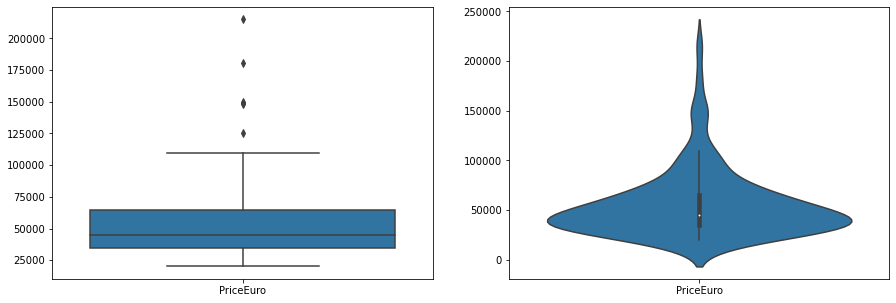

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df.select('PriceEuro').toPandas()
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(1,2,1)
ax=sns.boxplot(data=x)

ax=fig.add_subplot(1,2,2)
ax=sns.violinplot(data=x)

Text(0.5, 1.0, 'Scatter Plot')

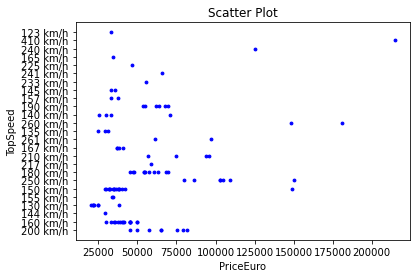

In [126]:
#Multi variant analysis
#scatter plot
x1 = df.toPandas()['PriceEuro'].values.tolist()
y1 = df.toPandas()['TopSpeed'].values.tolist()
plt.scatter(x1,y1,color='blue',s=8)
plt.xlabel('PriceEuro')
plt.ylabel('TopSpeed')
plt.title('Scatter Plot')

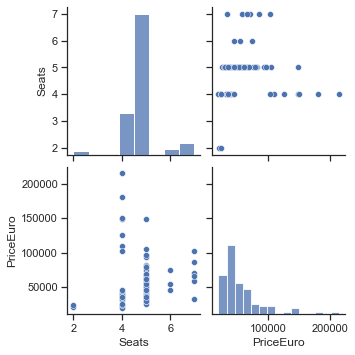

In [128]:
#pair plot 
scatter_plot =df.select('Seats','PriceEuro')

import seaborn as sns 
sns.set(style ='ticks')
sns.pairplot(scatter_plot.toPandas())
plt.show()

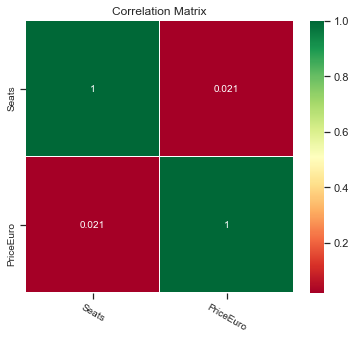

In [160]:
#Correlation Matrix 
import pandas as pd
df1=df.toPandas()
corr_data = df1[['Seats','PriceEuro']]
corr = corr_data.corr()


cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()


In [266]:
#Machine Learning -Linear Regression
from pyspark.ml.feature import VectorAssembler 
data2=df.select(df.Seats,df.PriceEuro.alias('label'))
train,test =data2.randomSplit([.7,.3])
assembler=VectorAssembler().setInputCols(['Seats',]).setOutputCol('features')
train01=assembler.transform(train)
'''only need features and label column'''
train02=train01.select("features","label")
train02.show(truncate=False)

+--------+------+
|features|label |
+--------+------+
|[2.0]   |24565 |
|[4.0]   |20129 |
|[4.0]   |21421 |
|[4.0]   |22030 |
|[4.0]   |24534 |
|[4.0]   |24790 |
|[4.0]   |31681 |
|[4.0]   |32997 |
|[4.0]   |35921 |
|[4.0]   |37900 |
|[4.0]   |38017 |
|[4.0]   |40936 |
|[4.0]   |41526 |
|[4.0]   |45000 |
|[4.0]   |102945|
|[4.0]   |125000|
|[4.0]   |180781|
|[4.0]   |215000|
|[5.0]   |25500 |
|[5.0]   |29146 |
+--------+------+
only showing top 20 rows



In [258]:
#Machine Learning -Linear Regression
# Import LinearRegression class\n"
from pyspark.ml.regression import LinearRegression
lr = LinearRegression()
model = lr.fit(train02)
test01 = assembler.transform(test)
test02 = test01.select('features', 'label')
test03 = model.transform(test02)
test03.show(truncate=False)

+--------+------+-----------------+
|features|label |prediction       |
+--------+------+-----------------+
|[4.0]   |20129 |55549.0423514538 |
|[4.0]   |21421 |55549.0423514538 |
|[4.0]   |32997 |55549.0423514538 |
|[4.0]   |34900 |55549.0423514538 |
|[4.0]   |38017 |55549.0423514538 |
|[4.0]   |45000 |55549.0423514538 |
|[4.0]   |109302|55549.0423514538 |
|[4.0]   |180781|55549.0423514538 |
|[5.0]   |29234 |54207.52718078383|
|[5.0]   |29682 |54207.52718078383|
|[5.0]   |30000 |54207.52718078383|
|[5.0]   |32646 |54207.52718078383|
|[5.0]   |33133 |54207.52718078383|
|[5.0]   |35000 |54207.52718078383|
|[5.0]   |36837 |54207.52718078383|
|[5.0]   |36837 |54207.52718078383|
|[5.0]   |38105 |54207.52718078383|
|[5.0]   |40000 |54207.52718078383|
|[5.0]   |45000 |54207.52718078383|
|[5.0]   |46900 |54207.52718078383|
+--------+------+-----------------+
only showing top 20 rows



In [260]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator()
print(evaluator.evaluate(test03,{evaluator.metricName: "r2"}))

-0.02261268298925434


In [261]:

print(model.coefficients)

[-1341.515170669964]


In [262]:
print (model.intercept)

60915.10303413365
